In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150

In [22]:
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)

In [23]:
Data_list = []

for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows = 3)
    Data_list.append(Data)

In [24]:
c = const.c
eps0 = const.epsilon_0
T = 0.5
R = 0.5
I_av = [np.mean(i) for i in Data_list]
# Guess values for function
a_guess = (1/4)*c*eps0*9.9**2
b_guess = (2*np.pi)/(600e-7)

/tmp/ipykernel_2735/1347994000.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure() #plot raw data


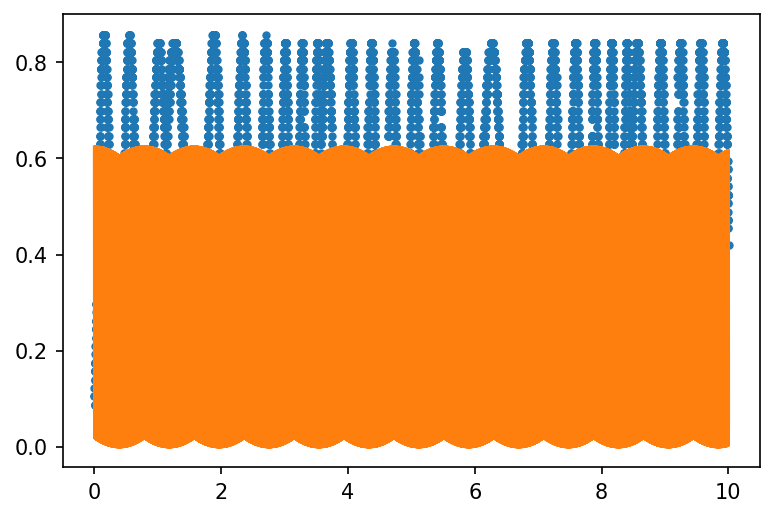

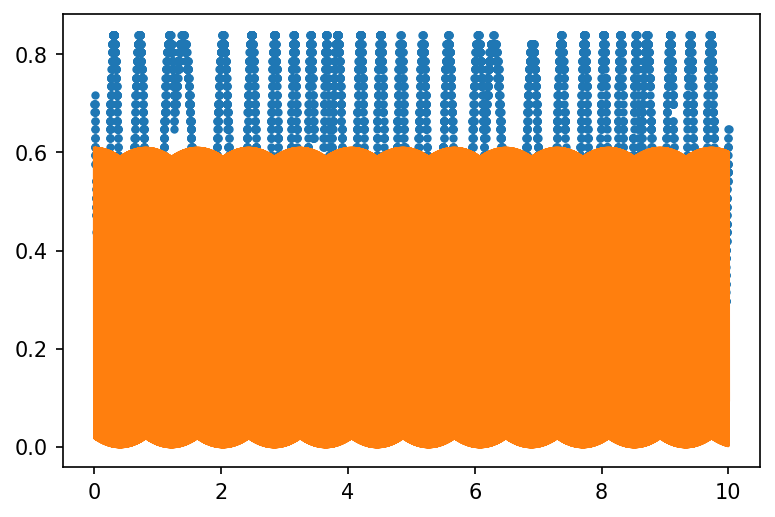

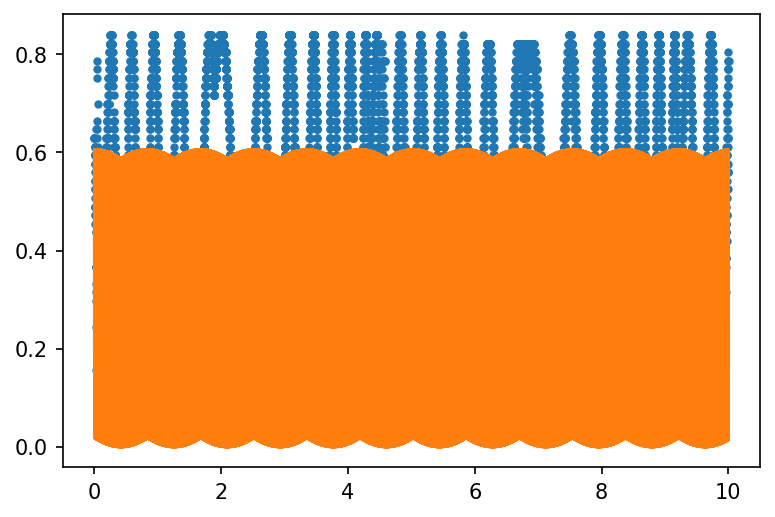

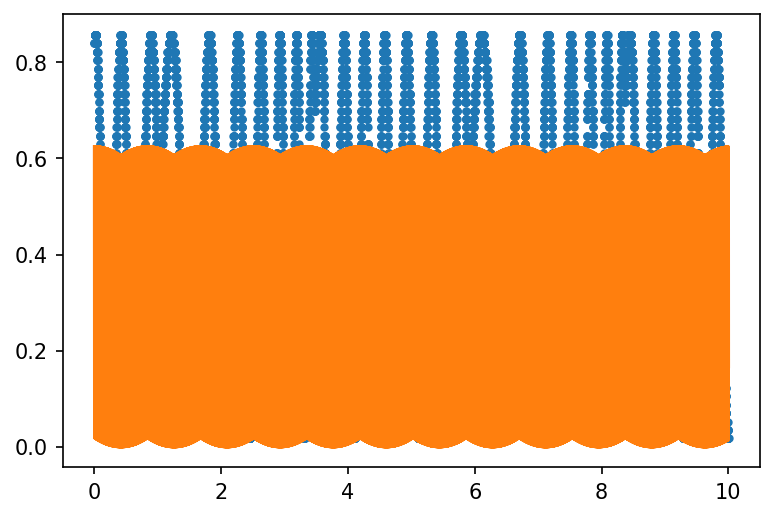

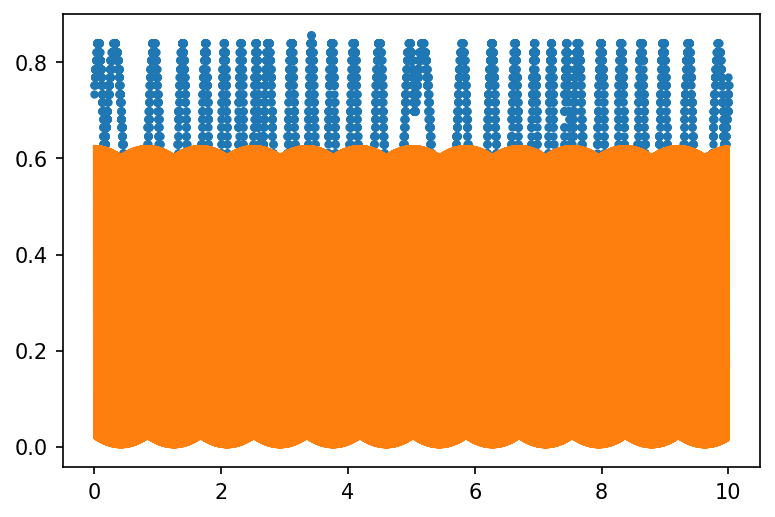

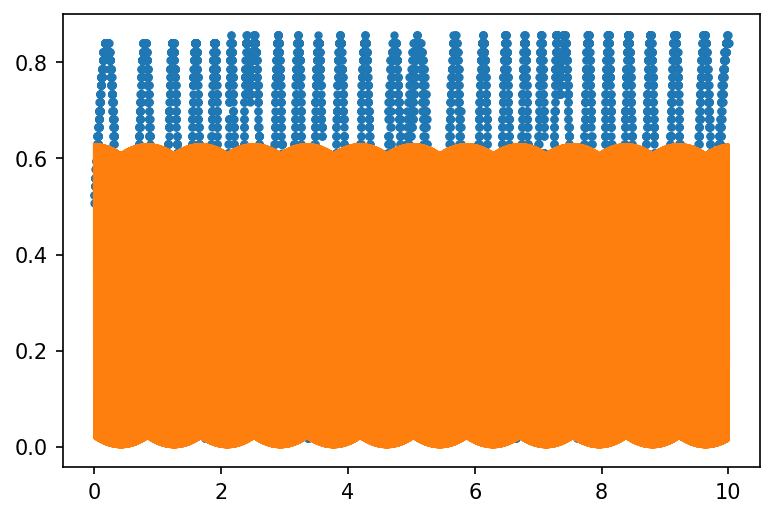

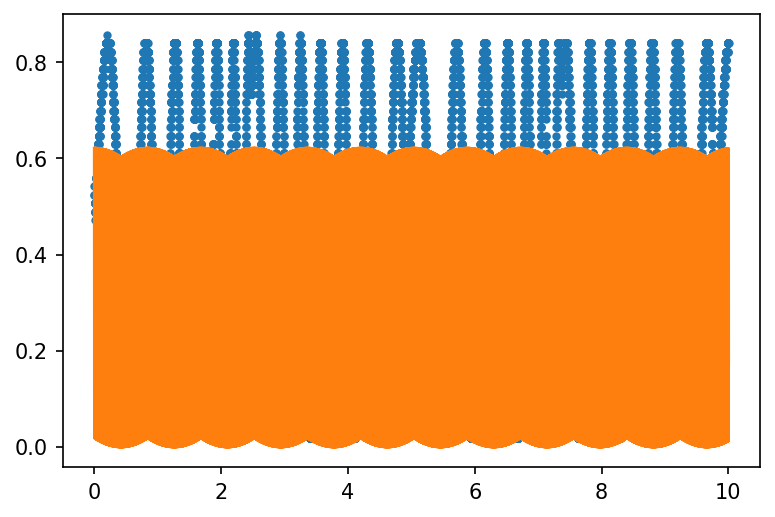

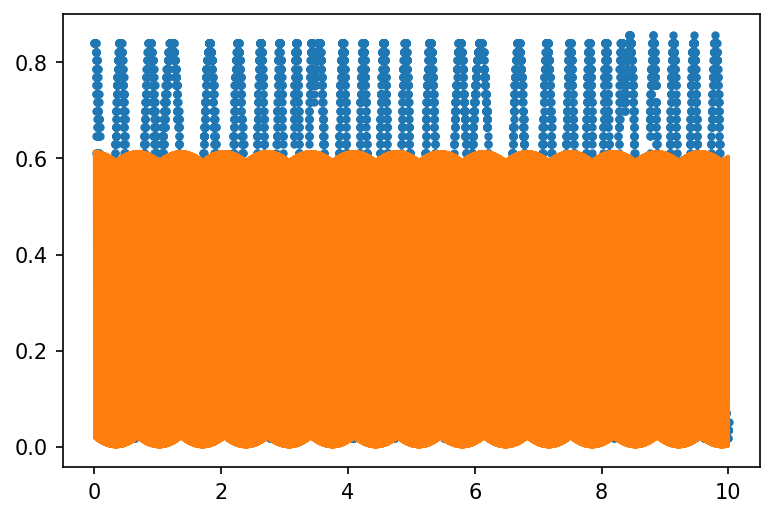

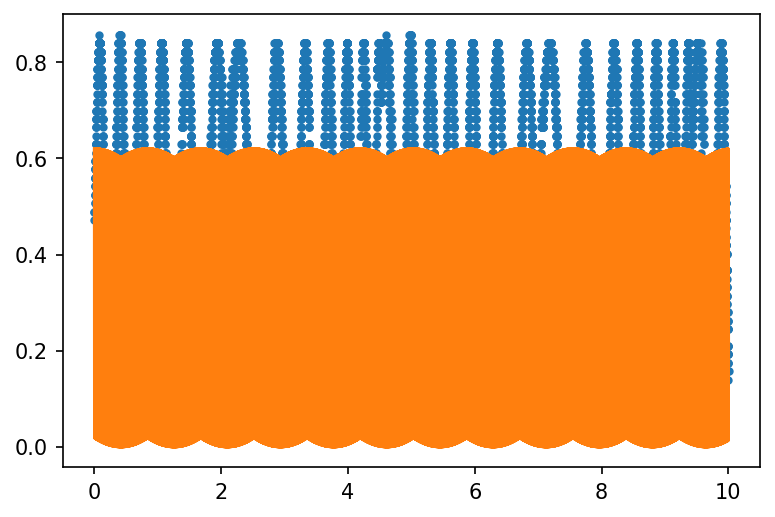

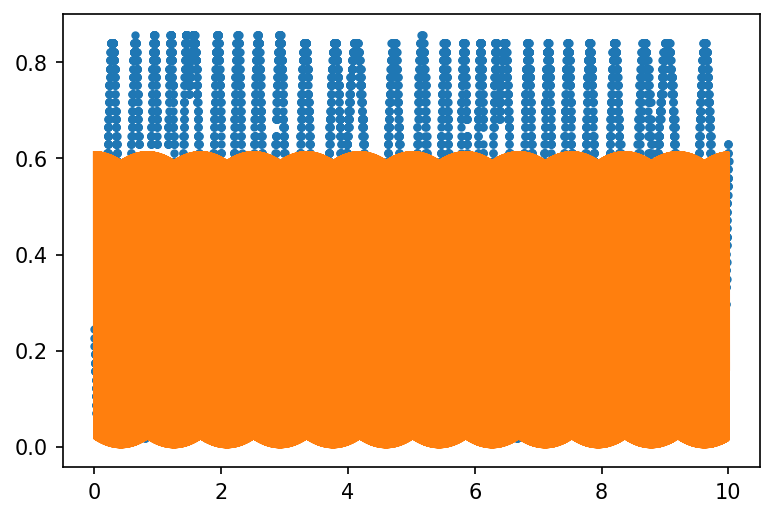

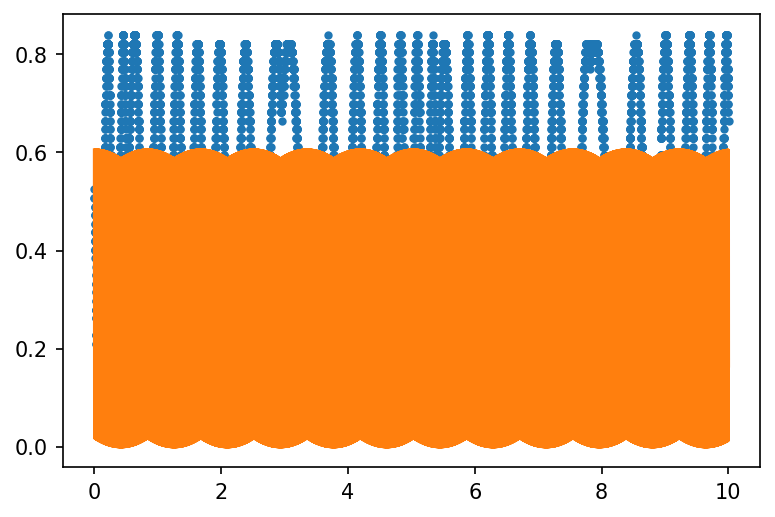

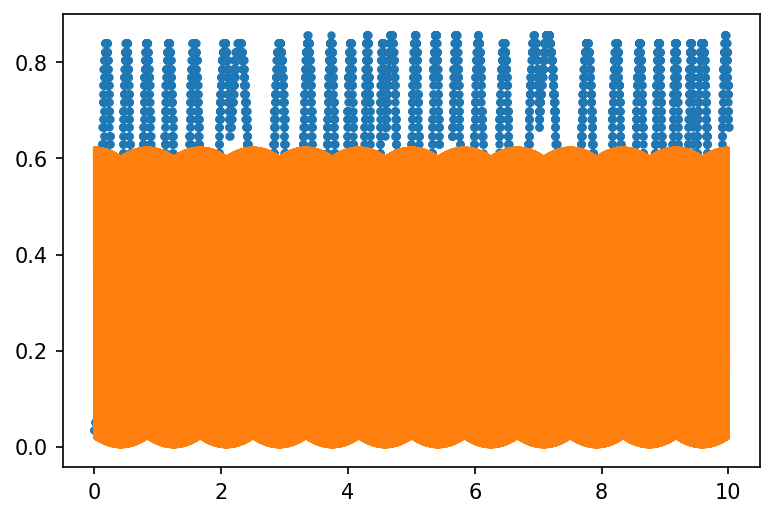

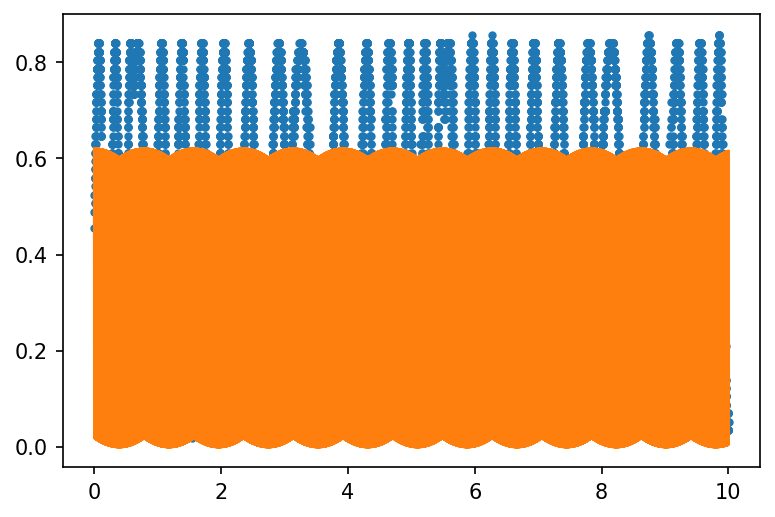

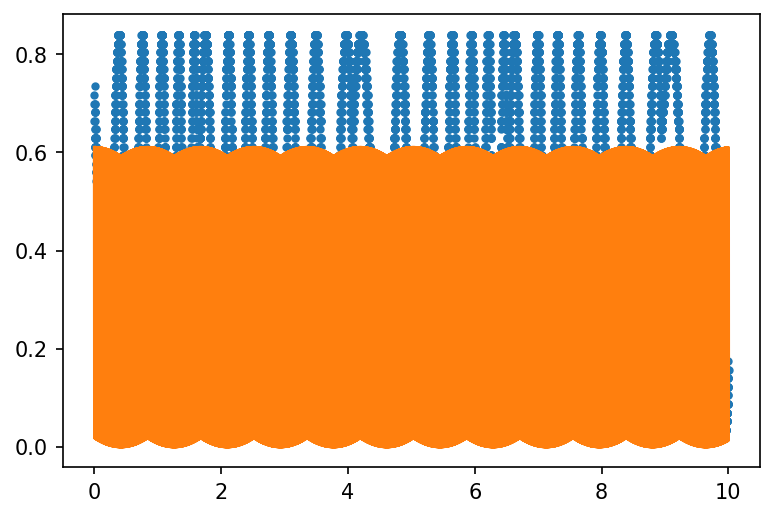

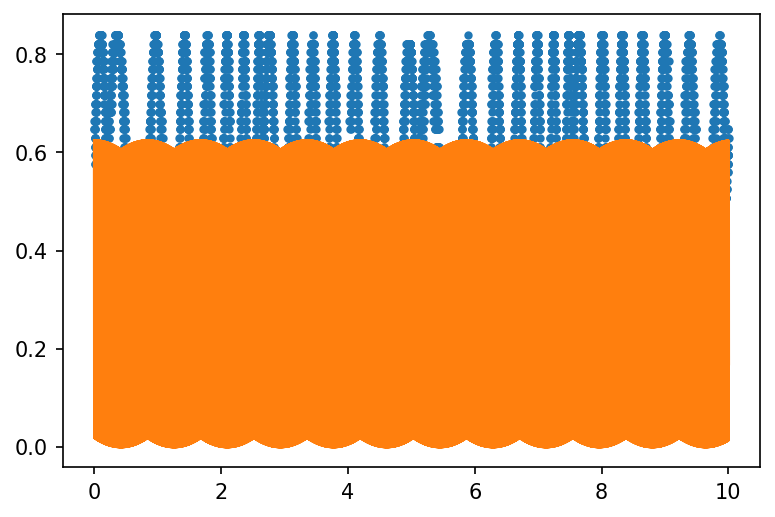

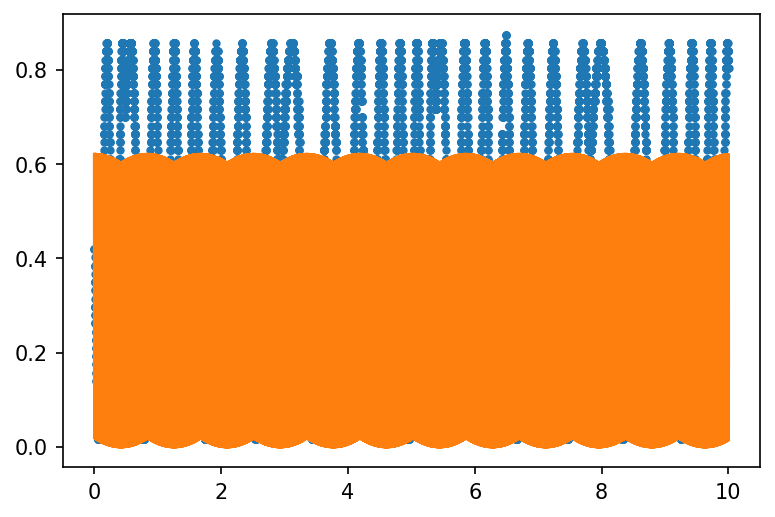

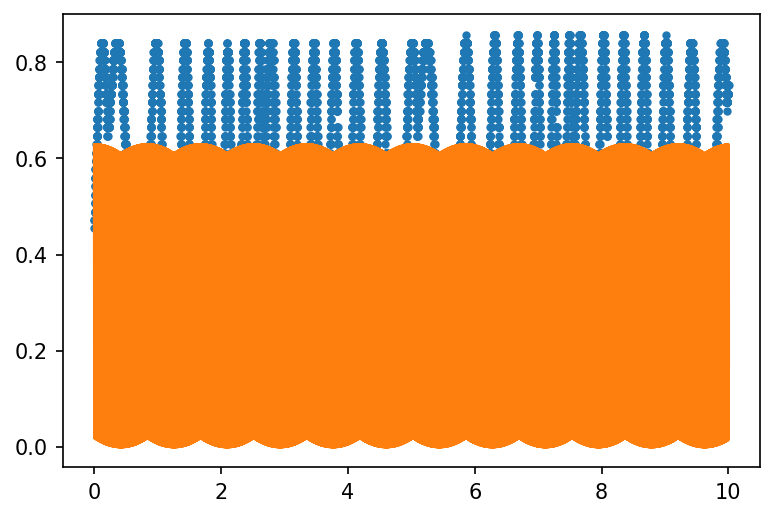

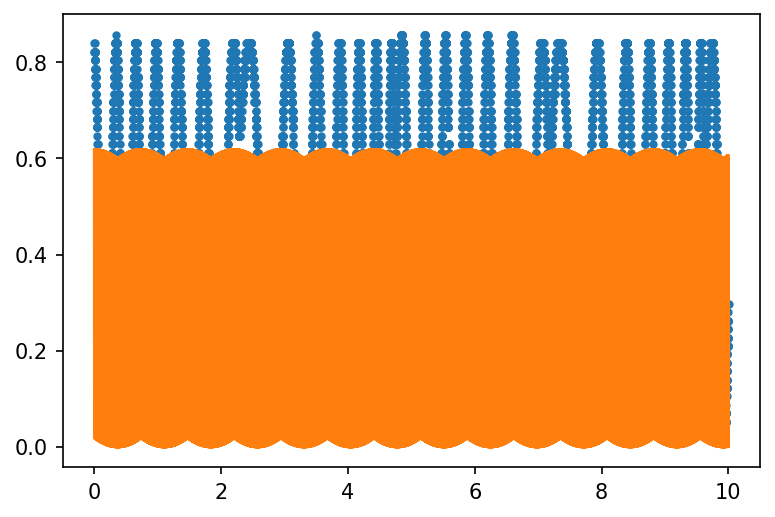

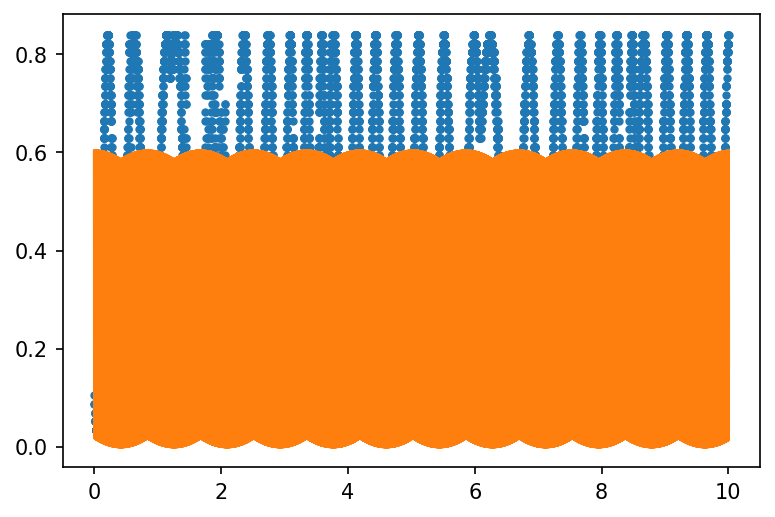

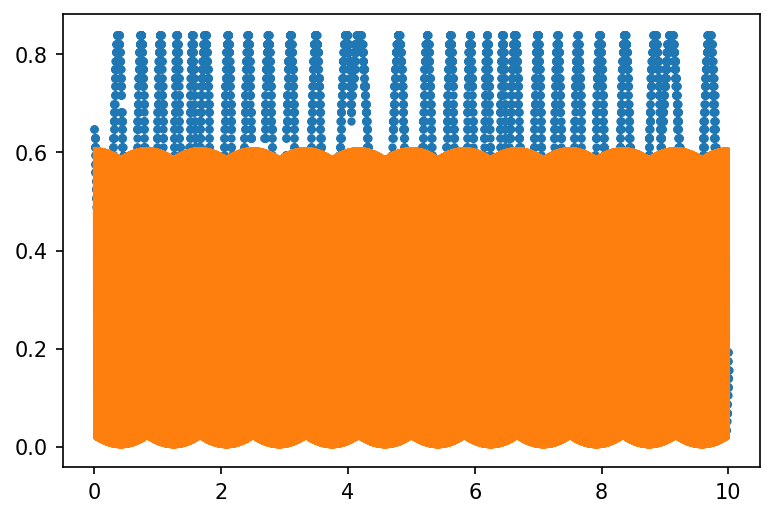

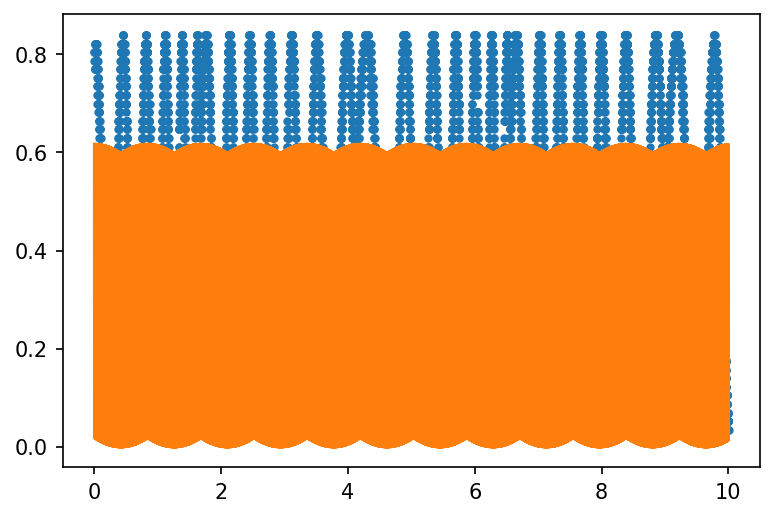

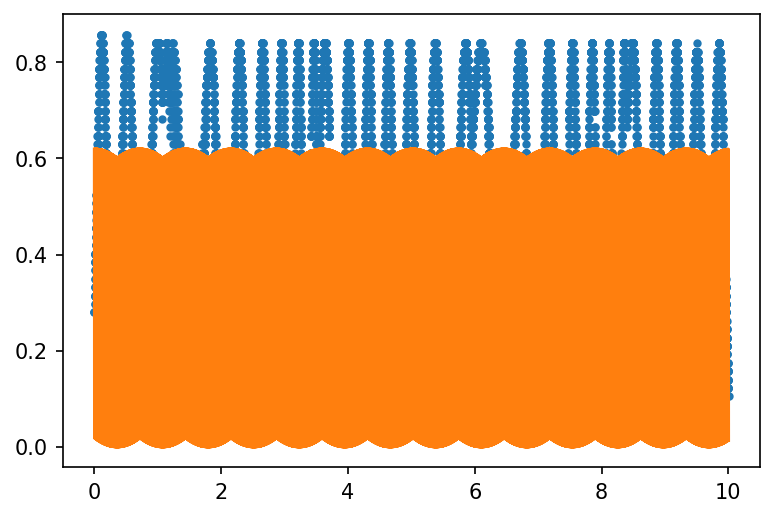

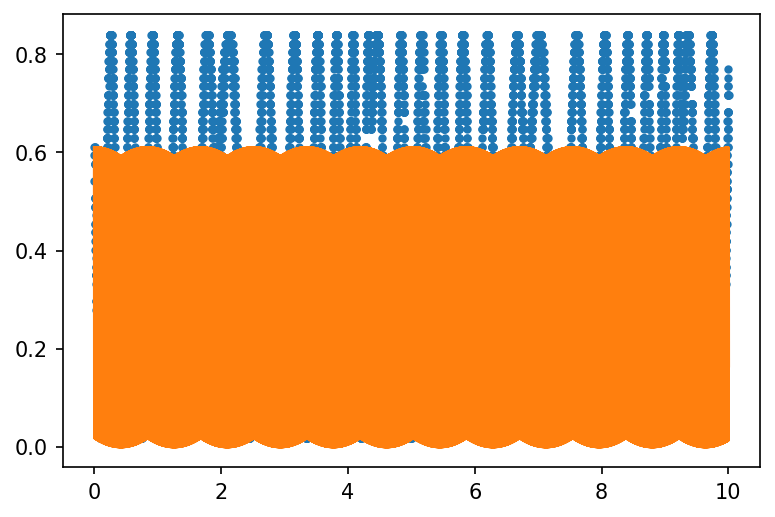

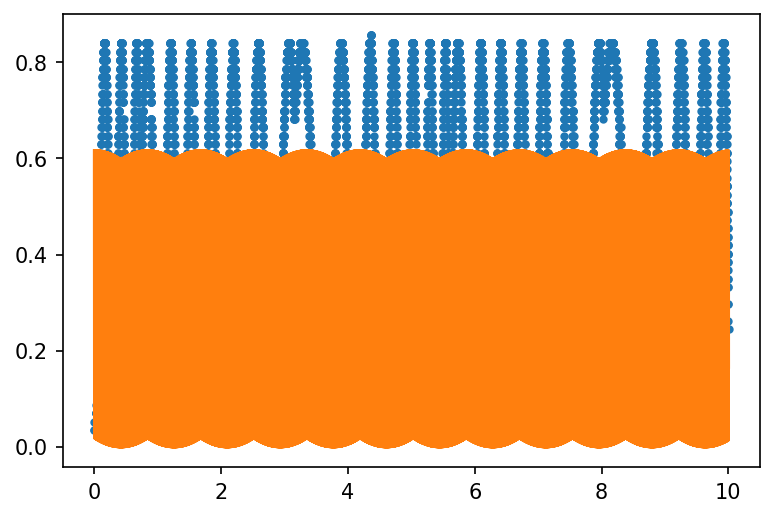

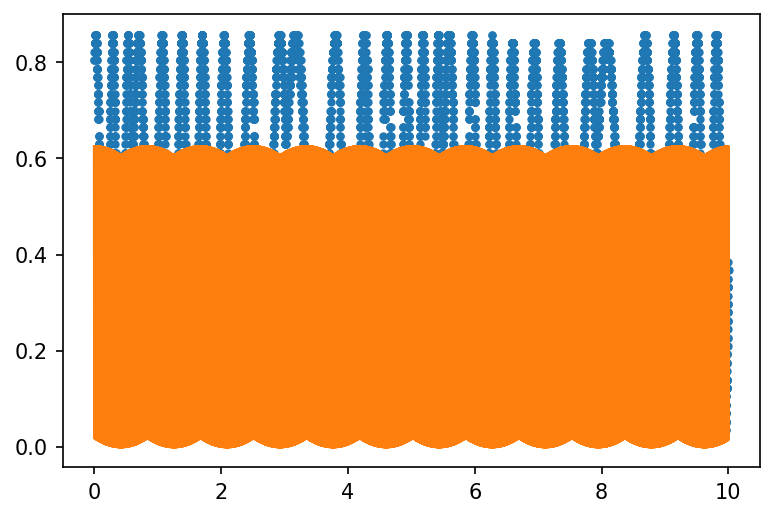

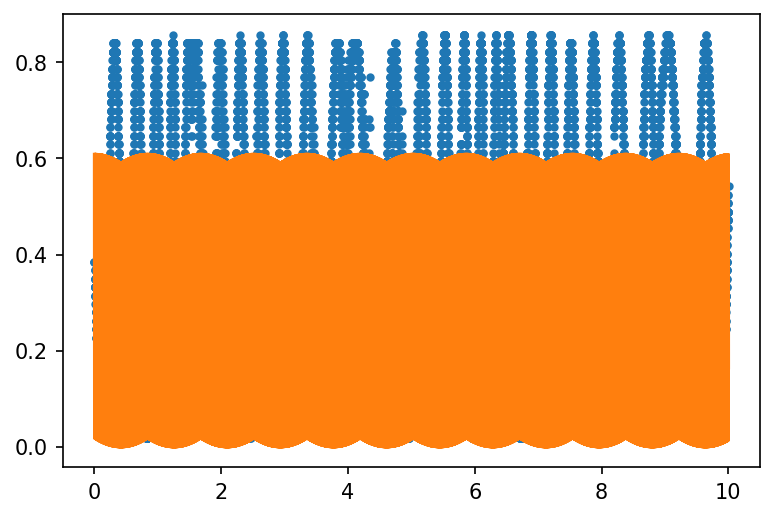

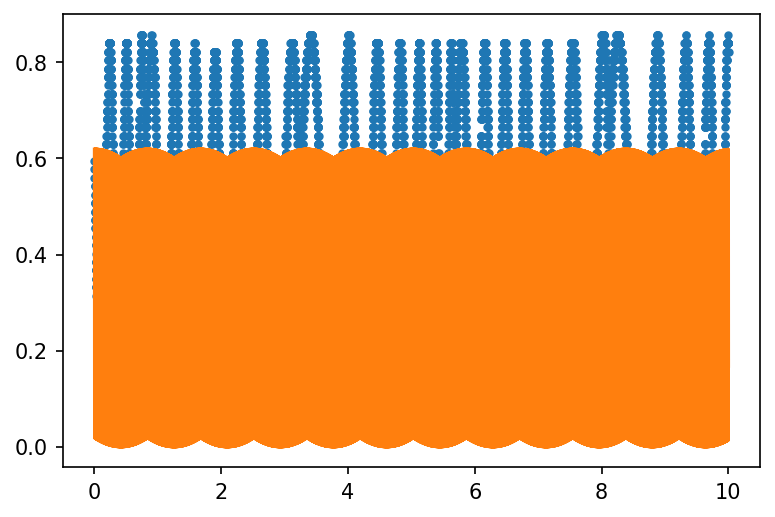

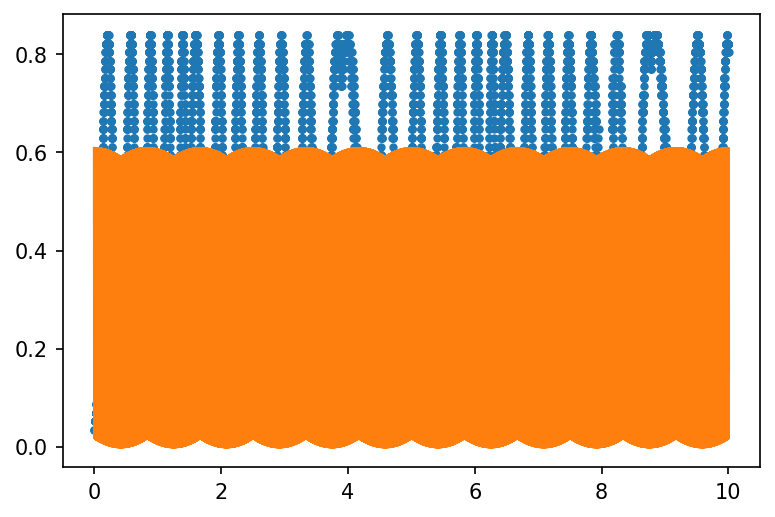

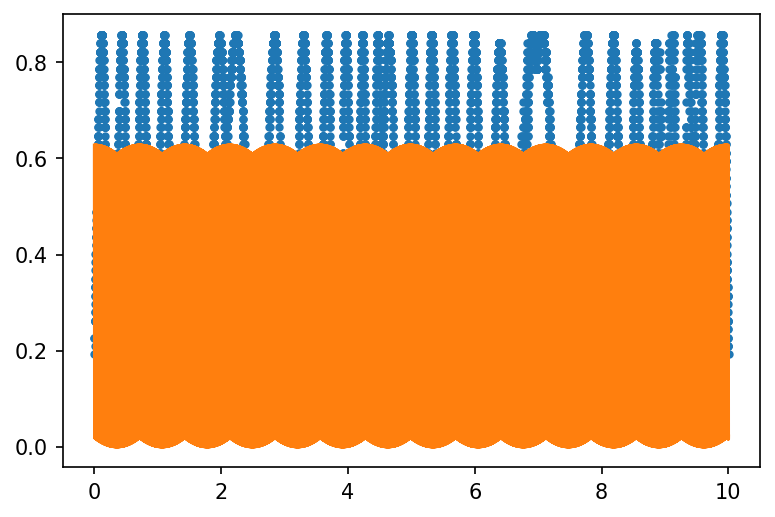

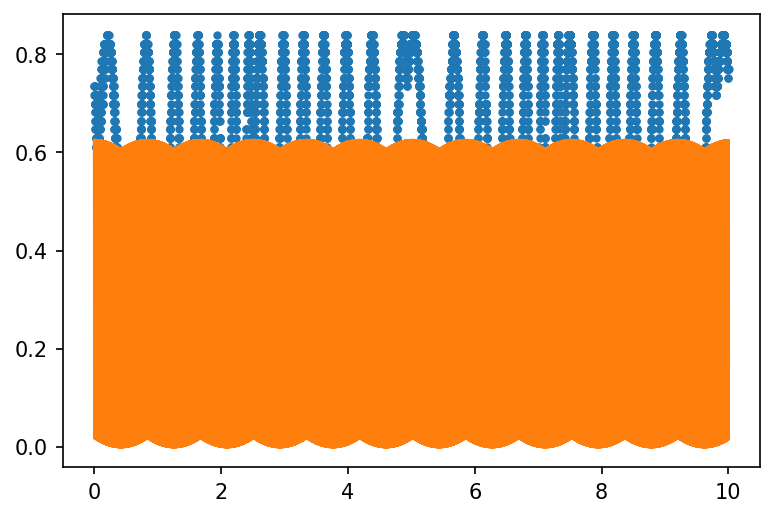

In [25]:
# Fit data to as sine function just to try something

def Intensity(ds,*p): #define fitting function
    #E0 = p[0]
    #w = p[1]
    #phi1 = p[2]
    #phi2 = p[3]
    a = p[0]
    b = p[1]
    return a * (1+np.cos(b*ds))
    #return c * eps0 * T * R * E0**2 * (np.cos(w * t + phi1) + np.cos(w * t + phi2))**2

for Data,Data_name in zip(Data_list,Data_names):
    plt.figure() #plot raw data
    Time=Data[:,0]
    V1=Data[:,1]
    V2=Data[:,2]
    plt.plot(Time, V1, '.', label='Data 1')
    #plt.plot(Time,V2, label='Data 2')
    #plt.xlabel('Time [s]')
    #plt.ylabel('Voltage [V]')
    
    #Do fit to first sine wave, make guesses on amplitide with max(V1)-min(V1), make guess based on frequency written in Data_name float(Data_name[24:27])
    popt1, pcov1 = sp.curve_fit(Intensity, Time, V1, p0 = [a_guess, b_guess])
    plt.plot(Time, Intensity(Time ,*popt1),'-',label='fit 1')
    #plt.legend()
    
    

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


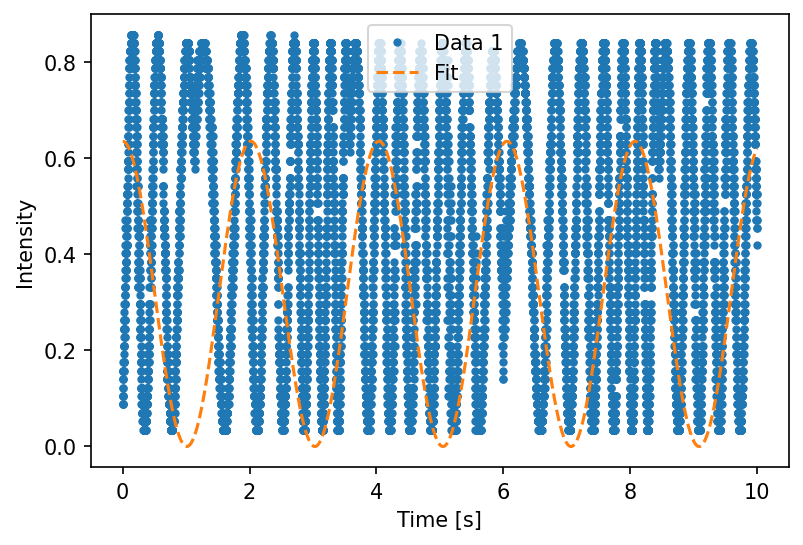

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


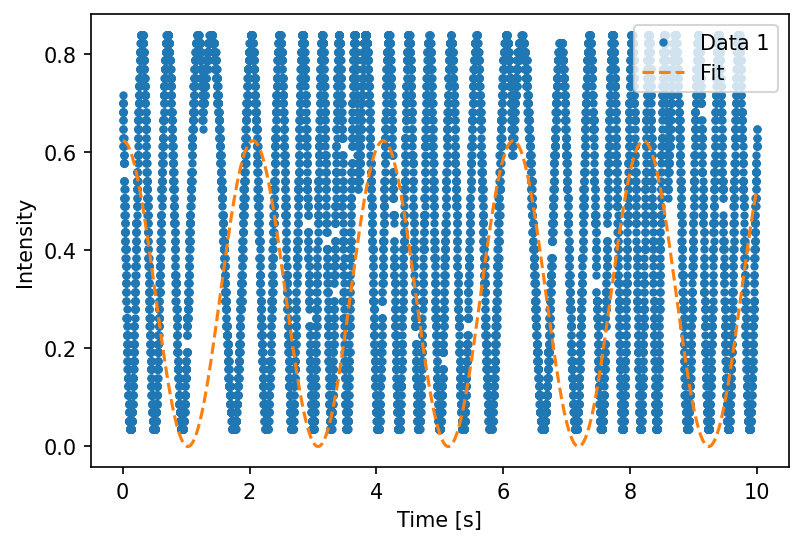

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


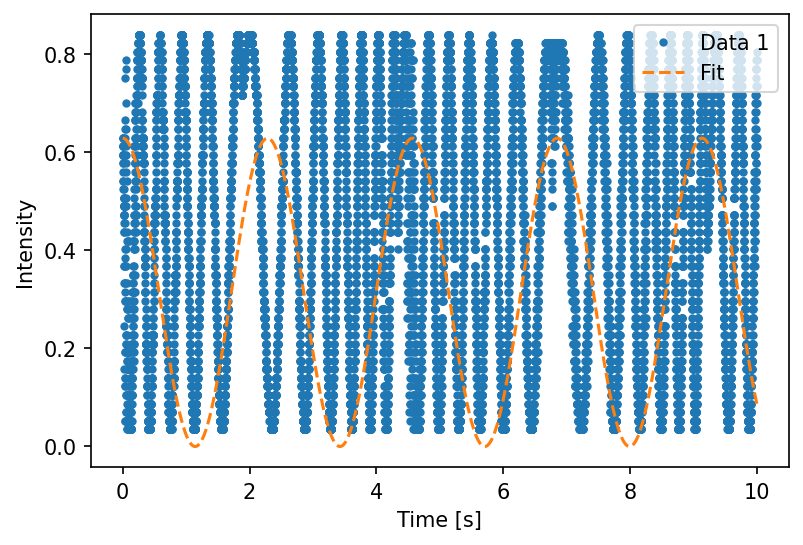

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


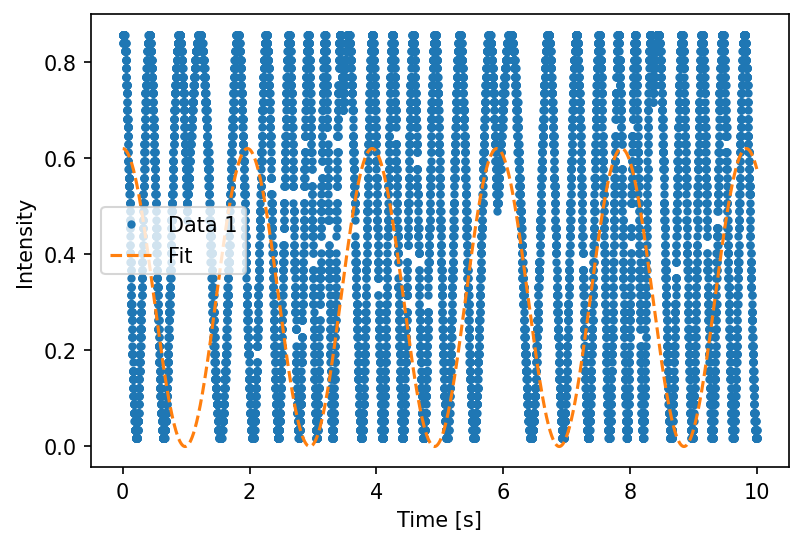

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


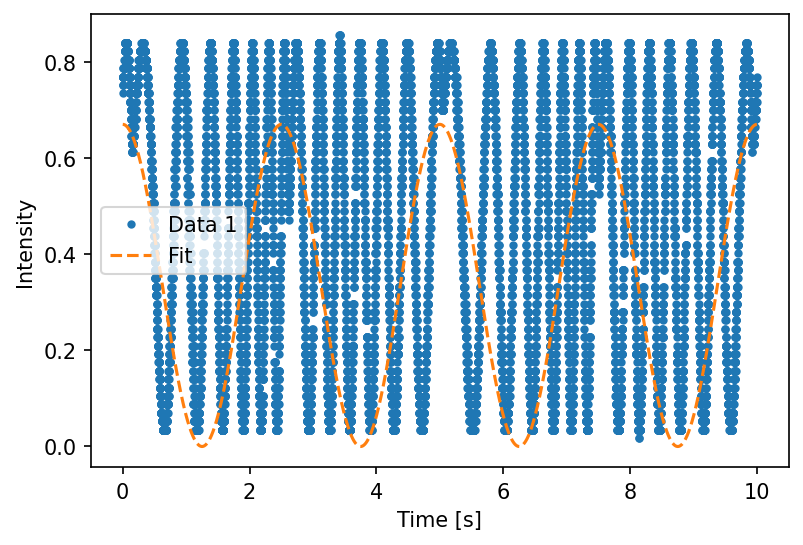

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


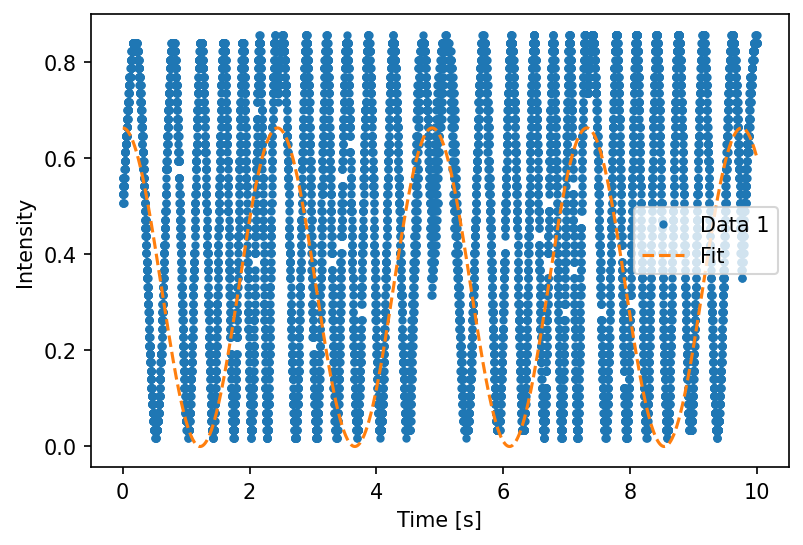

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


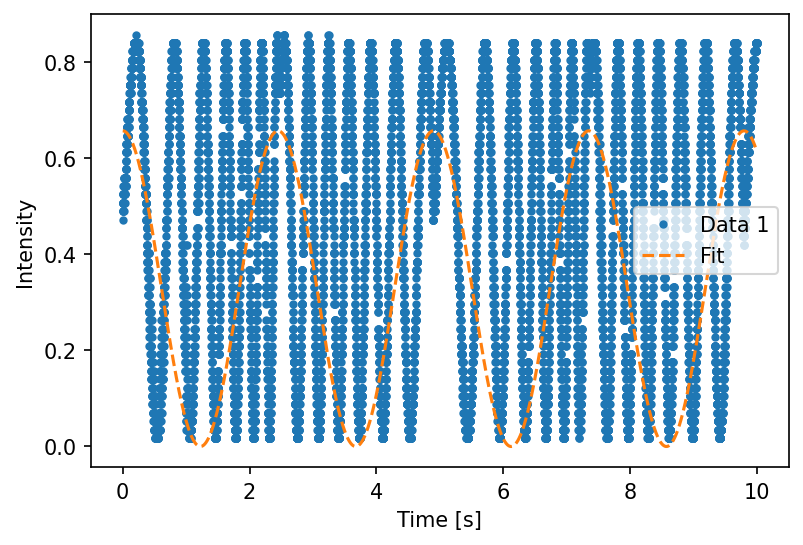

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


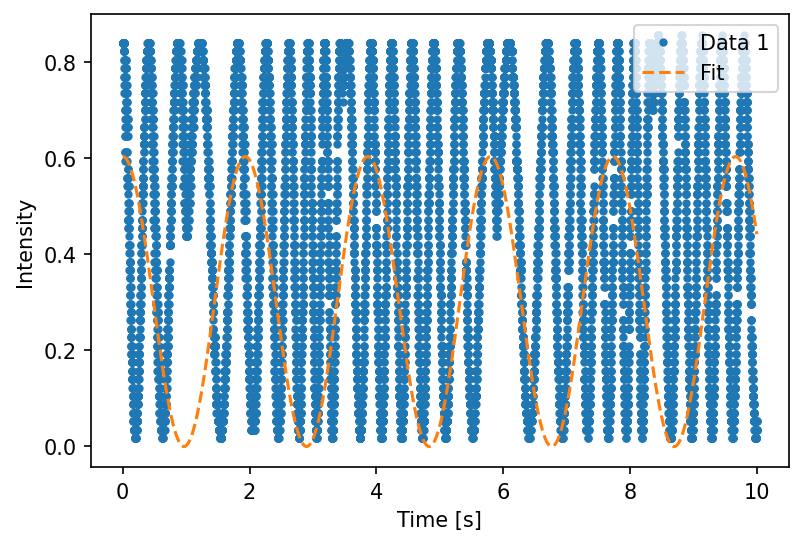

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


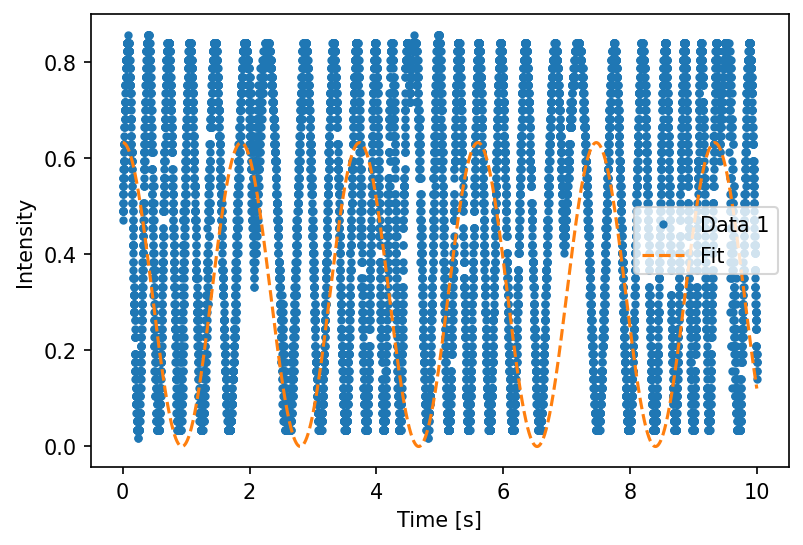

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


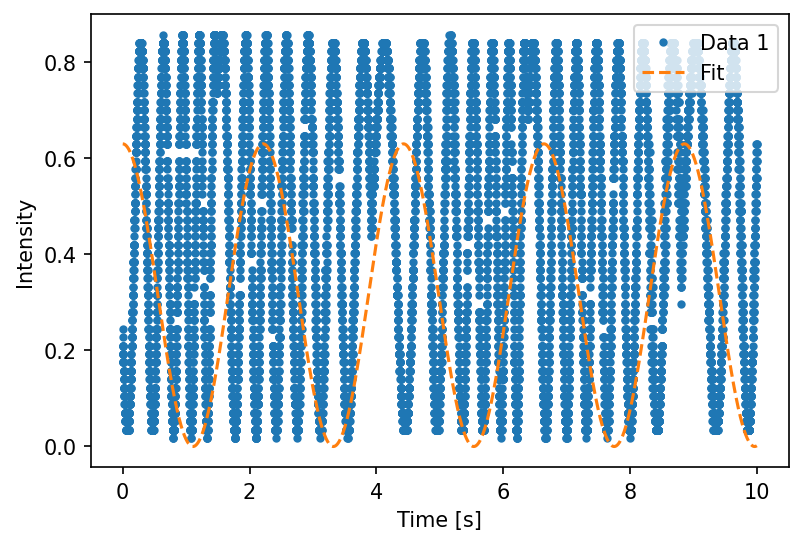

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


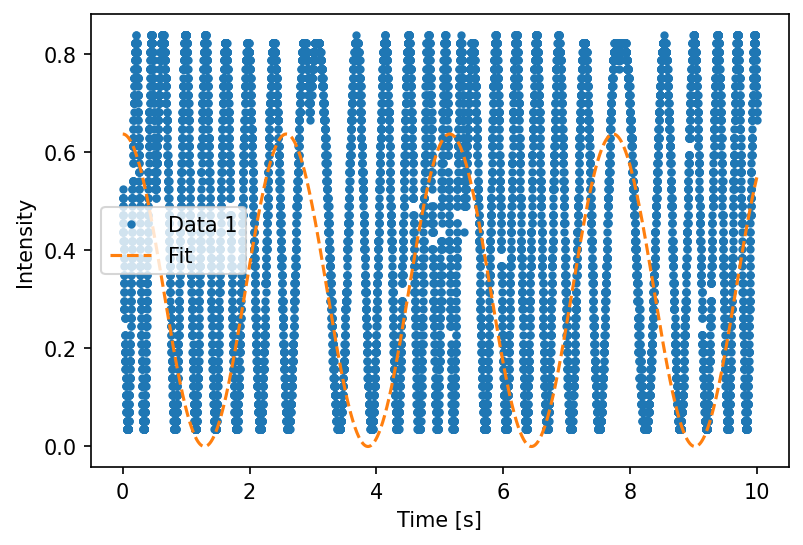

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


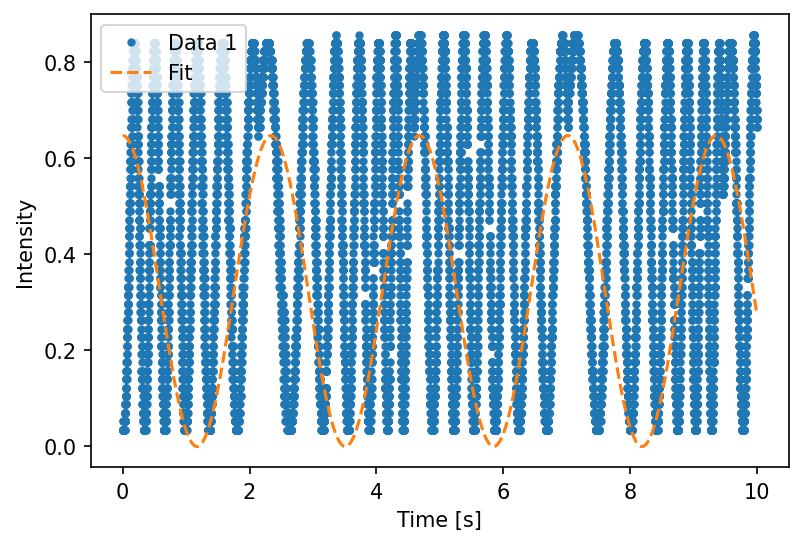

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


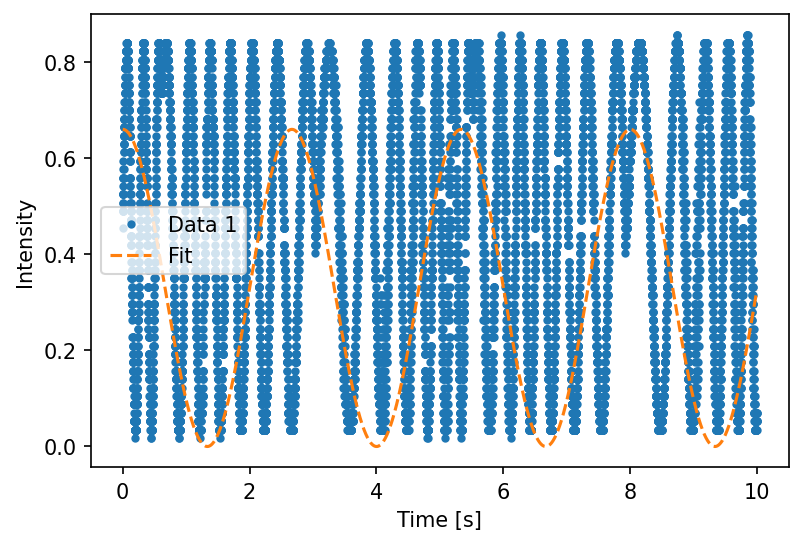

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


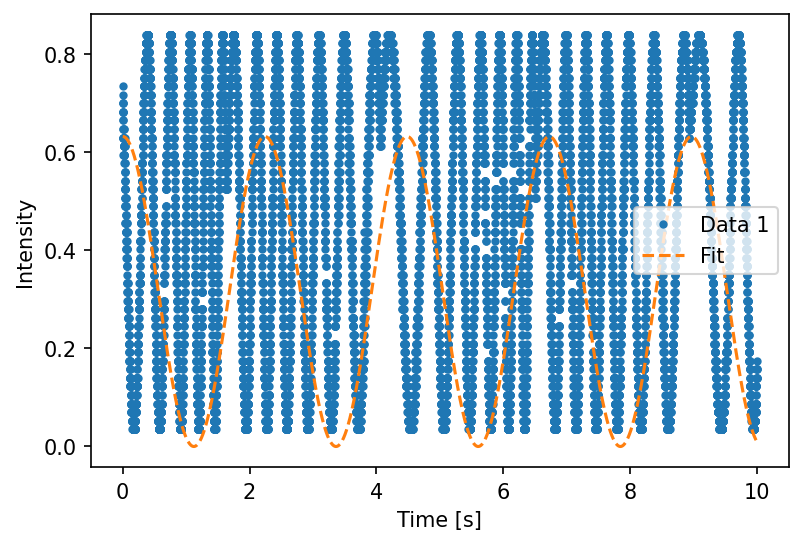

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


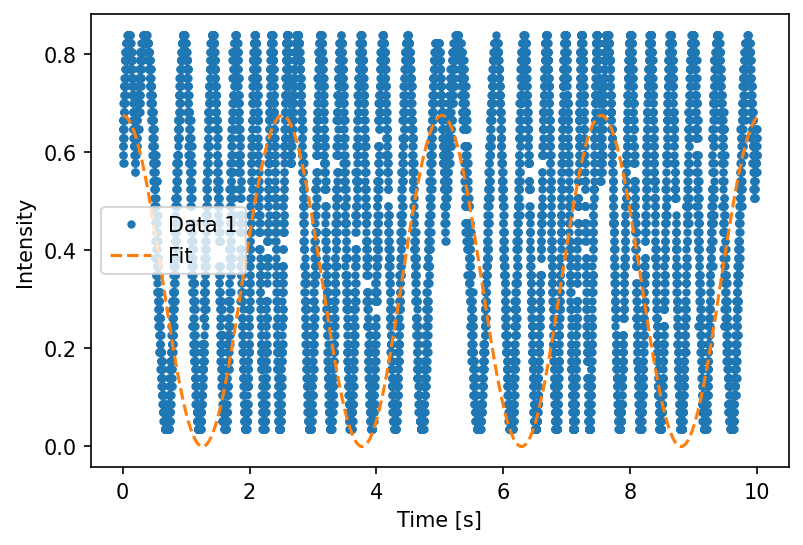

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


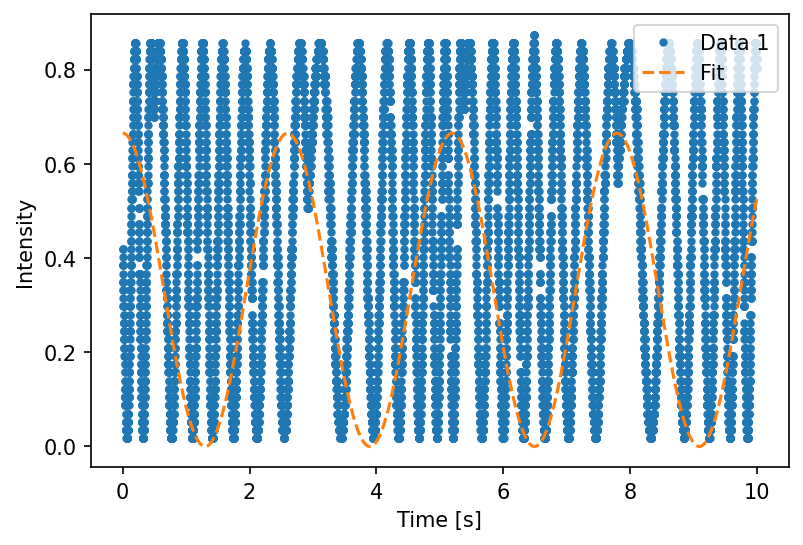

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


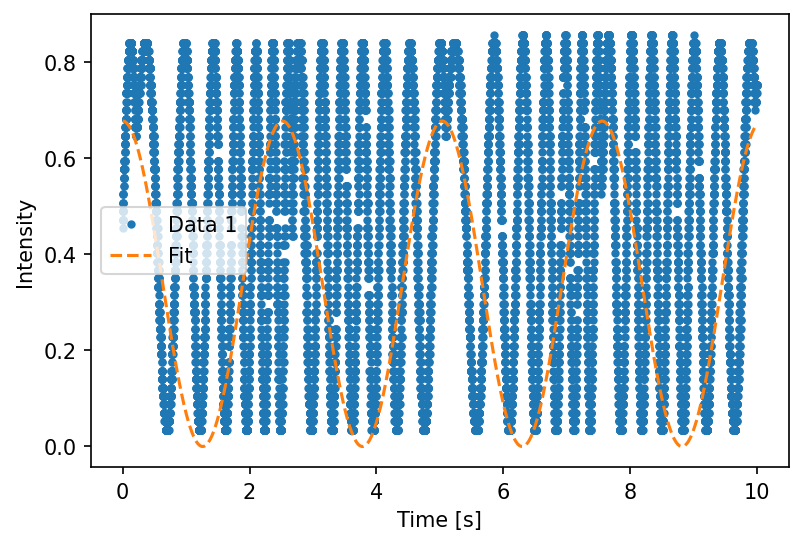

In [26]:
# Normalize data
def normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

# Initial guess function for frequency and phase
def initial_guess(data):
    normalized_data = normalize(data[:, 1])
    # Guess frequency based on the full spectrum of frequencies
    freqs = np.fft.fftfreq(len(data[:, 0]), data[1, 0] - data[0, 0])
    fft_values = np.fft.fft(normalized_data)
    dominant_freq_index = np.argmax(np.abs(fft_values[1:])) + 1
    dominant_freq = freqs[dominant_freq_index]
    
    # Refine phase guess using autocorrelation
    autocorr = np.correlate(normalized_data, normalized_data, mode='full')
    phase_guess = np.argmax(autocorr) * (data[1, 0] - data[0, 0]) * 2 * np.pi
    
    return [max(data[:, 1]) - min(data[:, 1]), abs(dominant_freq), phase_guess, 0]

popt_list = []
pcov_list = []

for Data, Data_name in zip(Data_list, Data_names):
    plt.plot(Data[:, 0], Data[:, 1], '.', label='Data 1')

    try:
        # Perform the fit with initial guesses for parameters
        popt, pcov = sp.curve_fit(Intensity, Data[:, 0], Data[:, 1], p0=initial_guess(Data))
        popt_list.append(popt)
        pcov_list.append(pcov)

        # Plot the fitted curve
        plt.plot(Data[:, 0], Intensity(Data[:, 0], *popt), '--', label='Fit')

        plt.xlabel('Time [s]')
        plt.ylabel('Intensity')
        plt.legend()
        plt.show()
        
    except RuntimeError:
        print(f"Optimal parameters not found for dataset: {Data_name}. Skipping...")
        continue


In [ ]:
np.sqrt(pcov_list)

array([[[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]],

       [[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]],

       [[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]],

       [[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]],

       [[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]],

       [[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]],

       [[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]],

       [[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]],

       [[inf, inf, inf, 